# Base de datos compañia de inmuebles

In [446]:
#importamos la libreria pandas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [412]:
# importamos el fichero 
data = pd.read_excel('data.xlsx',usecols="B:AA",skiprows=4,nrows=267)

## Limpiaza de datos

In [414]:
# Borrar columnas que no se utilizará
del(data['Unnamed: 10'],data['Intervalo'])

In [416]:
# Borrando filas con datos faltantes 
data = data.dropna(0)

In [423]:
# De float a Int
data = data.astype({'Año de la venta':int,'Mes de la venta':int,'Y':int,'M':int,'D':int,'# de propiedad':int,'Satisfacción con el trato':int,'Edad al momento de compra':int})

## ¿Que grupo de personas son más propensas de comprar el producto?

In [425]:
# Podemos ver que los datos obtenidos son sesgados ya que el nombre de la persona que compro no siempre es el único que vivirá o compro el producto
pd.value_counts(data['Género'])

M    99
F    65
Name: Género, dtype: int64

Text(0, 0.5, 'Frecuencia')

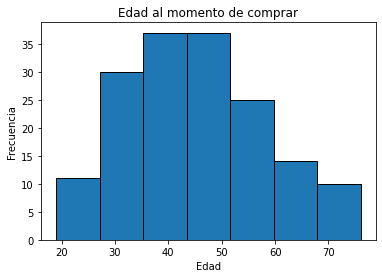

In [479]:
# Graficamos una distribución de frecuencias de las edad
plt.hist(data['Edad al momento de compra'],bins=7,ec='black')
plt.title('Edad al momento de comprar')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

/home/fode/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


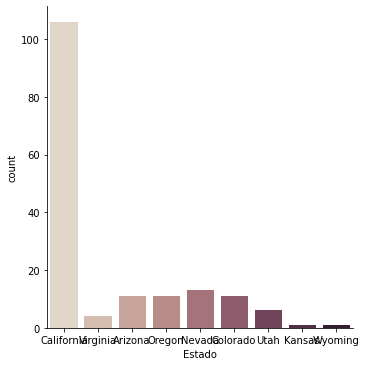

In [490]:
# Histograma de clientes por región
sns.catplot('Estado',kind='count',data=data,palette='ch:.25')

In [466]:
#calculamos la media de la edad
data['Edad al momento de compra'].mean()

45.457317073170735

In [467]:
#calculamos la mediana de la edad
data['Edad al momento de compra'].median()

44.0

In [468]:
#Calculamos la moda de la edad
data['Edad al momento de compra'].mode()

0    48
dtype: int64

In [480]:
#calculamos la varianza
data['Edad al momento de compra'].var()

163.93068232829566

In [481]:
#calculamos la desviación estandar
data['Edad al momento de compra'].std()

12.803541788438684

/home/fode/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


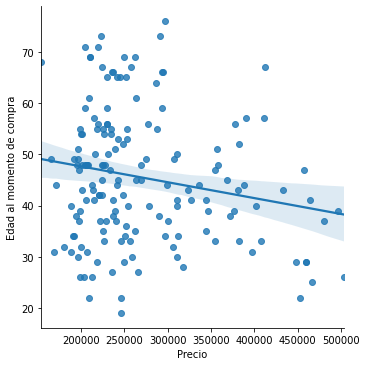

In [484]:
# relacion entre la edad y el precio
sns.lmplot('Precio','Edad al momento de compra',data=data)

In [486]:
# Calculamos la covarianza
data[['Precio','Edad al momento de compra']].cov()

,Precio,Edad al momento de compra
Precio,6.190989e+09,-191568.967380
Edad al momento de compra,-1.915690e+05,163.930682


In [487]:
data[['Precio','Edad al momento de compra']].corr()

,Precio,Edad al momento de compra
Precio,1.000000,-0.190158
Edad al momento de compra,-0.190158,1.000000


## Conclusión

- Es mas común o probable que los hombres firmen contratos y son potencialmente una mejor audiencia para nuestros anuncios.
- 